Author: Ahmed Youri Sobhi [ahmedyousrisobhi@gmail.com]

Creation_date: 7th Sep 2023

Notebook number : 3

Objective: Dataset EDA after cleaning.

Abstract:
- Now the dataset is cleaned, let's dig more into data exploration and analysis.

# Importing Required Libararies and Packages

In [36]:
import warnings
warnings.filterwarnings('ignore')

import os

import pandas as pd
import numpy as np

# Used for visulization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

# For iteration visulization purpose
from tqdm import tqdm

# Data Loading

In [37]:
df = (
    pd.read_csv('../data/intermid/marketing_campaign.csv')
    .assign(
        Dt_Customer= lambda x:pd.to_datetime(x.Dt_Customer, format='%Y-%m-%d')
    )
)

# Display first 5 rows
df.head(5)

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Living_With
0,5524,1957,Graduation,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,Alone
1,2174,1954,Graduation,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,Alone
2,4141,1965,Graduation,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,Partner
3,6182,1984,Graduation,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,Partner
4,5324,1981,PhD,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,Partner


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143 entries, 0 to 2142
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2143 non-null   int64         
 1   Year_Birth           2143 non-null   int64         
 2   Education            2143 non-null   object        
 3   Income               2143 non-null   float64       
 4   Kidhome              2143 non-null   int64         
 5   Teenhome             2143 non-null   int64         
 6   Dt_Customer          2143 non-null   datetime64[ns]
 7   Recency              2143 non-null   int64         
 8   MntWines             2143 non-null   int64         
 9   MntFruits            2143 non-null   int64         
 10  MntMeatProducts      2143 non-null   int64         
 11  MntFishProducts      2143 non-null   int64         
 12  MntSweetProducts     2143 non-null   int64         
 13  MntGoldProds         2143 non-nul

In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2143.0,5577.097993,3254.677178,0.0,2800.0,5453.0,8417.0,11191.0
Year_Birth,2143.0,1968.919739,11.927657,1893.0,1960.0,1970.0,1977.0,1996.0
Income,2143.0,51172.612692,20276.965107,4428.0,34951.0,50616.0,67269.5,113734.0
Kidhome,2143.0,0.451703,0.539197,0.0,0.0,0.0,1.0,2.0
Teenhome,2143.0,0.511433,0.543818,0.0,0.0,0.0,1.0,2.0
Recency,2143.0,49.010733,28.957975,0.0,24.0,49.0,74.0,99.0
MntWines,2143.0,286.915539,310.752015,0.0,23.0,170.0,483.0,1296.0
MntFruits,2143.0,26.161456,39.687941,0.0,2.0,8.0,32.0,199.0
MntMeatProducts,2143.0,159.041064,211.673063,0.0,15.0,64.0,217.0,984.0
MntFishProducts,2143.0,37.559029,55.148125,0.0,3.0,12.0,50.0,259.0


# Multi-Varient Analysis

## 1- Customer Purchase Behavior Analysis
Description: This analysis aims to analysis the customer spending behavior on various product categories (e.g., wine, meat, fruit) and how it relates to their household composition (e.g. Income, Kids)

### What is the most bought product?

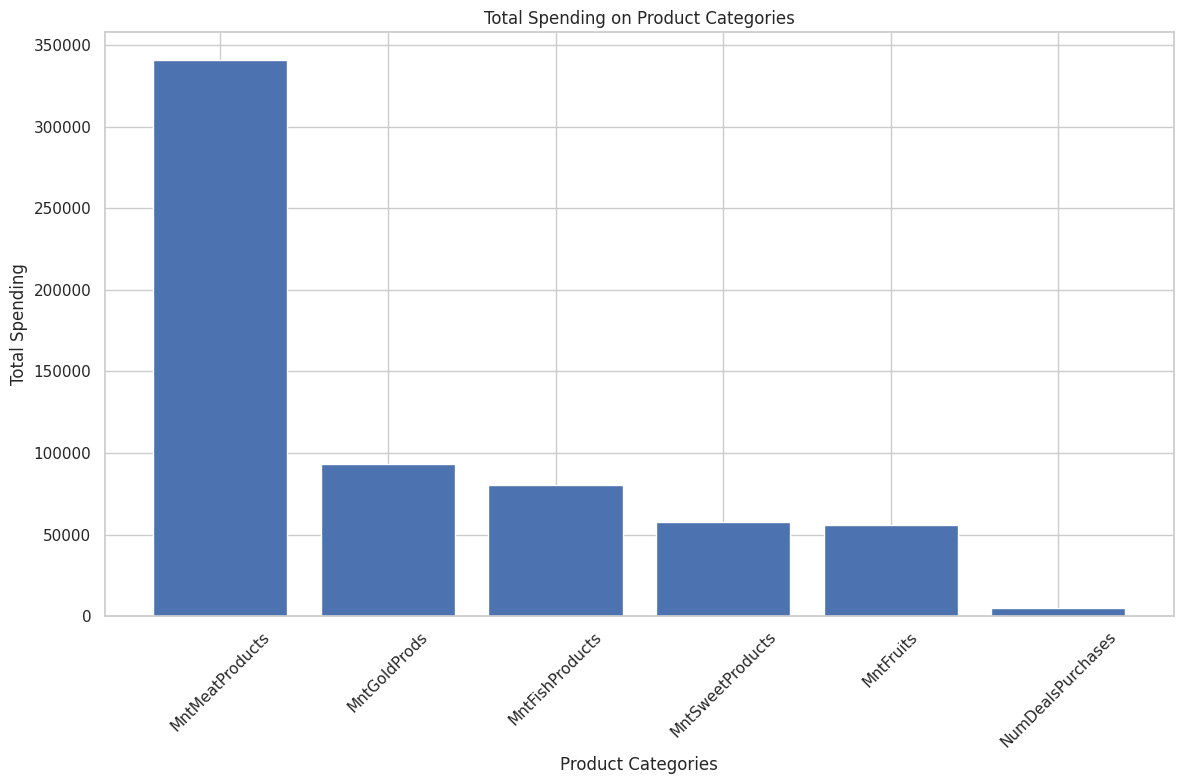

In [40]:
# Bar plot of spending on wine
df_product_speding = (
    df[df.columns[9:15]].sum()
    .reset_index()
    .rename(columns={'index':'products', 0:'spending'})
    .sort_values(by='spending', ascending=False)
)

plt.figure(figsize=(12, 8))
plt.bar(df_product_speding.products, df_product_speding.spending)
plt.xlabel('Product Categories')
plt.ylabel('Total Spending')
plt.title('Total Spending on Product Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../report/plots/Total Spending on Product Categories.jpg')
plt.show()

Insights: The most common purchased products were [Wines, Meats]

### Let's Visualize Purchase Behaviour over Education Factor

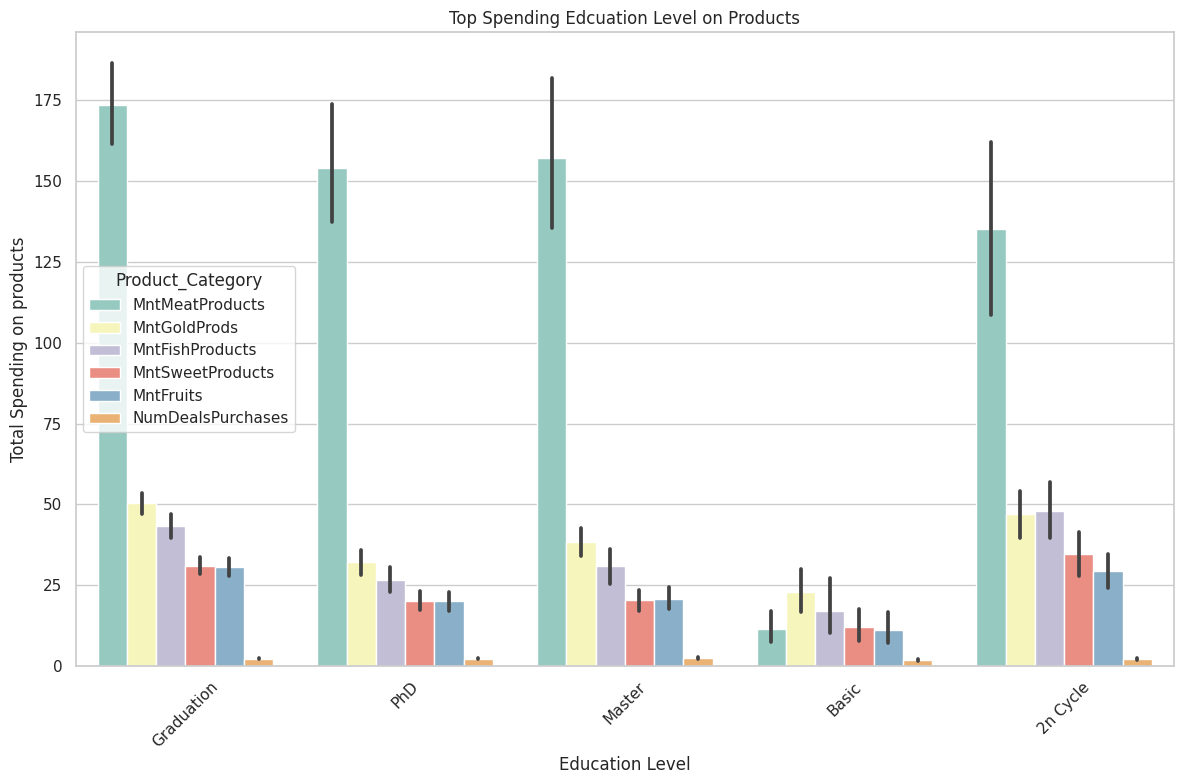

In [41]:
# Bar plot of spending on wine
features = df.columns[9:15].tolist()

df_melted = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Education', y='value', 
            hue='Product_Category',palette='Set3', 
            hue_order=df_melted.groupby('Product_Category')['value'].sum().sort_values(ascending=False).index)
plt.xlabel('Education Level')
plt.ylabel(f'Total Spending on products')
plt.title(f'Top Spending Edcuation Level on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Top Spending Edcuation Level on Products.jpg')
plt.show()

Insights:
- The most purchased products are Wines and Meats
- Customers with PhD level tends to buy more wines that the others.
- The higher the level of education the more tends to buy wines and meats.
- Level [Graduation & 2n Cycle] tends to buy more fish, sweet, and fruits products than other levels.
- Error Bars [Vertical black lines] are graphical representation of the variability of data an used on graphs to indicate the error or uncertainty in a reported measurements. So they are set to 95% of error.

### Explore Demographic factors regarding purchase behaviour by Customers

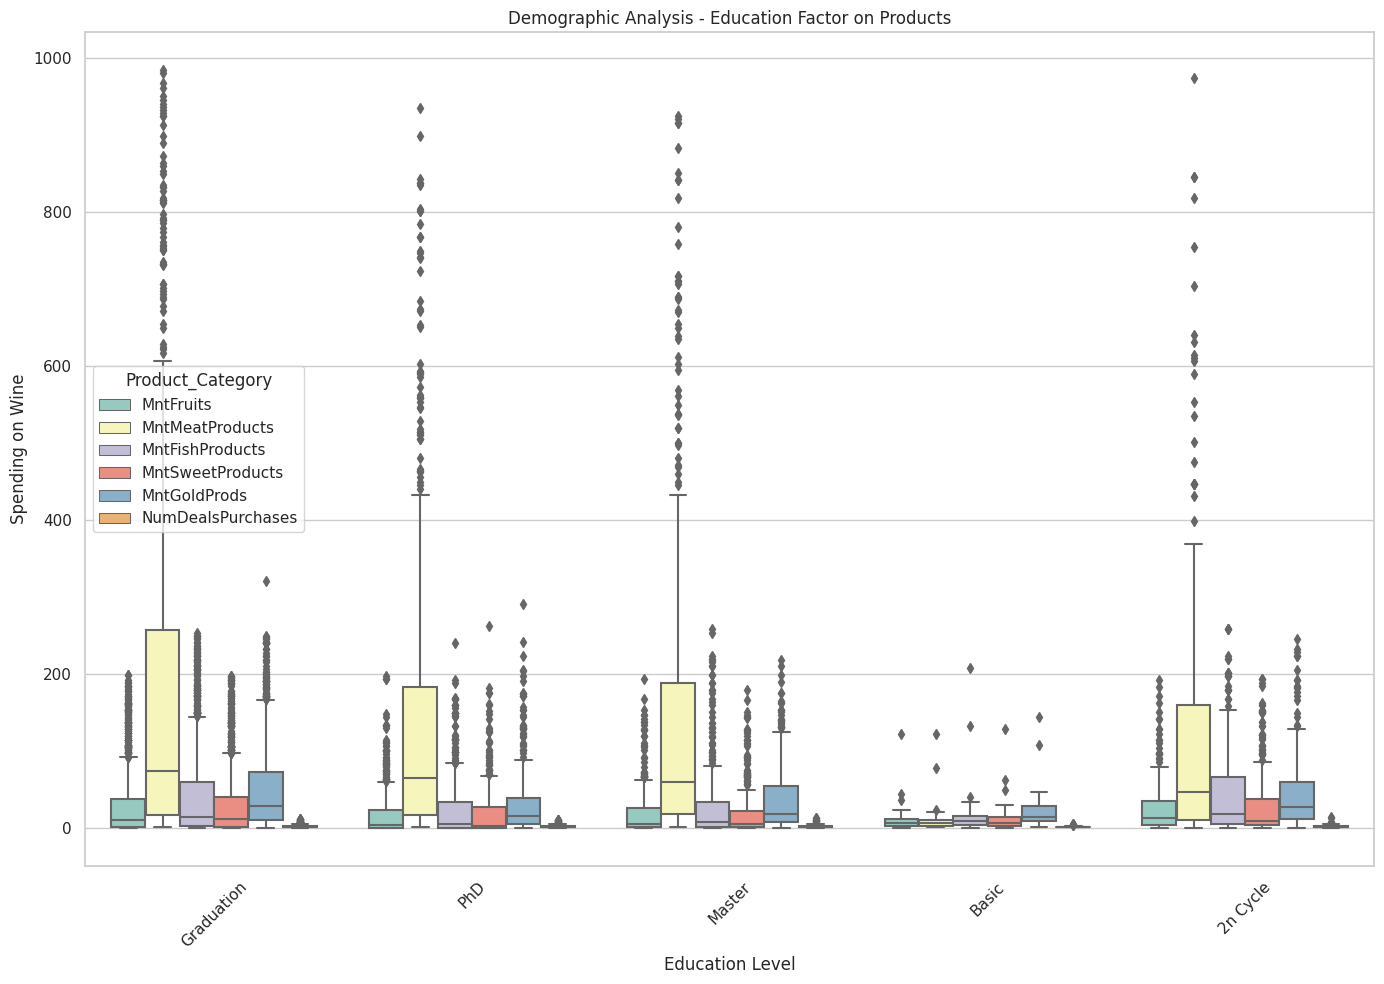

In [42]:
# Melt the DataFrame to combine columns 9 to 15 into a single column
melted_df = pd.melt(df, id_vars='Education', value_vars=df.columns[9:15], var_name='Product_Category')

# Example: Box plot of spending on wine by education level
plt.figure(figsize=(14, 10))
sns.boxplot(x='Education', y='value', hue='Product_Category', data=melted_df, palette='Set3')
plt.xlabel('Education Level')
plt.ylabel('Spending on Wine')
plt.title('Demographic Analysis - Education Factor on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Demographic Analysis - Education Factor on Products.jpg')
plt.show()

Insights:
- The demographic insights on the education level indicate that there are customers who tends to buy more in every products based on the outliers dots shown in the above figure, which could be cluster on their own.
- In each product, the central of tendency (median) are low which represent huge number of customers buying each type of products with a huge quantaties.

### Let's Visualize Purchase Behaviour over Maritail Status

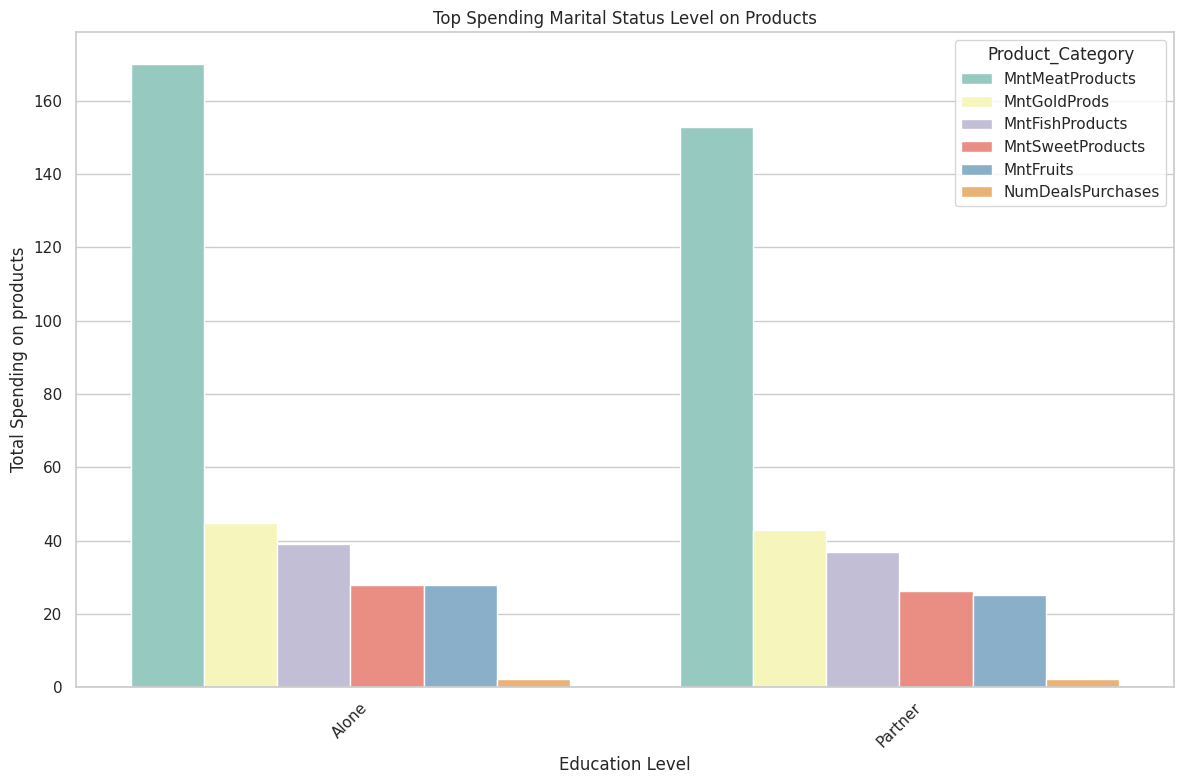

In [56]:
# Bar plot of spending on wine
features = df.columns[9:15].tolist()
factor = 'Living_With'
df_melted = pd.melt(df, id_vars=factor, value_vars=df.columns[9:15], var_name='Product_Category')

plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x=factor, y='value', 
            hue='Product_Category',palette='Set3', 
            hue_order=df_melted.groupby('Product_Category')['value'].sum().sort_values(ascending=False).index,
            ci=None)
plt.xlabel('Education Level')
plt.ylabel(f'Total Spending on products')
plt.title(f'Top Spending Marital Status Level on Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Top Spending Marital Status Level on Products.jpg')
plt.show()

Insight: 
- There are similarity between both products pruchases distribution over the Marital Status either you are Alone or living with a partner.

## Customer LifeTime Value (CLV) Analysis
- In this analysis, we will calculate the CLV for each customer based on their historical behavior, spending, and acceptance of campaigns, To gain insights about the average value for each accepted campaing.

In [45]:
# Assuming your dataset contains columns like 'Customer_ID', 'Income', 'MntWines', 'AcceptedCmp1', ...
# Define the period for CLV calculation (e.g., one year)
clv_period = (df.Dt_Customer.max() - df.Dt_Customer.min()).days

# Calculate total spending by each customer over the defined period
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Calculate CLV for each customer by multiplying their average daily spending by the CLV period
df['CLV'] = (df['Total_Spending'] / clv_period) * 365


In [46]:
df.CLV.describe()

count    2143.000000
mean      302.899973
std       302.467349
min         4.177396
25%        35.507868
50%       192.682403
75%       524.263233
max      1318.490701
Name: CLV, dtype: float64

In [47]:
# Identify high-value customers (you can define your own threshold)
high_value_threshold = 1000
high_value_customers = df[df['CLV'] > high_value_threshold]

print(f'Percentage of high value customers= {100*high_value_customers.shape[0]/df.shape[0]}')

# Segment customers into categories based on CLV
df['CLV_Category'] = pd.cut(df['CLV'], bins=[0, 500, 1000, float('inf')], labels=['Low-Value', 'Medium-Value', 'High-Value'])

# Analyze campaign effectiveness
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

clv_values = []

for campaign in campaigns:
    campaign_clv = df.groupby(campaign)['CLV'].mean()
    print(f"Average CLV for customers who accepted {campaign}: {campaign_clv[1]}")
    clv_values.append(campaign_clv[1])

# Convert to DataFrame
df_campaign_clv = pd.DataFrame({'Campaign':campaigns, 'Average_CLV':clv_values}).sort_values(by='Average_CLV', ascending=False)

# Predict future revenue using CLV data (A simple baseline)
# Here, we'll calculate the potential future revenue for high-value customers.
future_revenue = high_value_customers['CLV'].sum()

print(f"Predicted Future Revenue from High-Value Customers: ${future_revenue:.2f}")


Percentage of high value customers= 2.659822678488101
Average CLV for customers who accepted AcceptedCmp1: 747.2110384449439
Average CLV for customers who accepted AcceptedCmp2: 601.3314475224347
Average CLV for customers who accepted AcceptedCmp3: 354.84102747514765
Average CLV for customers who accepted AcceptedCmp4: 549.0107049479552
Average CLV for customers who accepted AcceptedCmp5: 813.3303528850739
Predicted Future Revenue from High-Value Customers: $62104.83


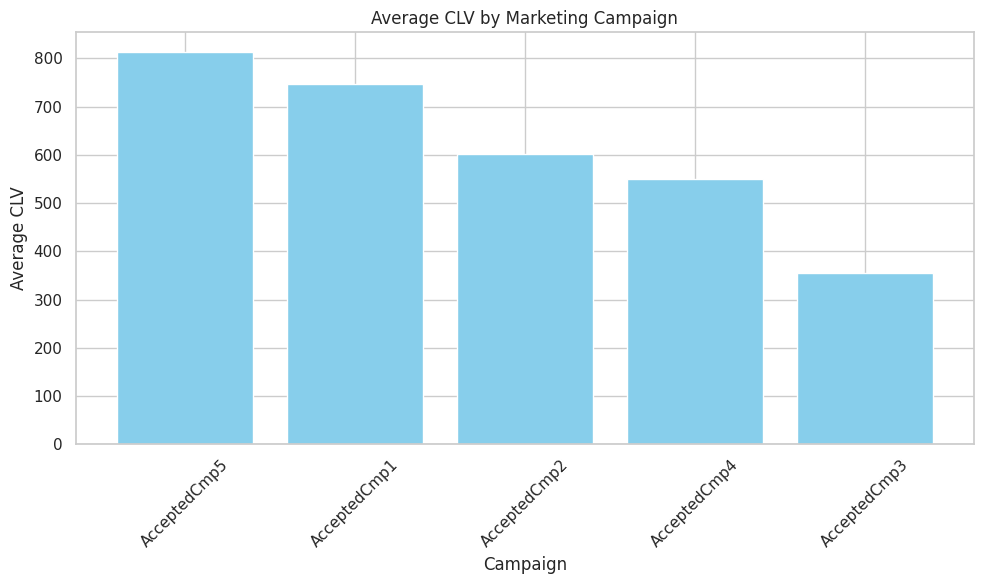

In [57]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df_campaign_clv['Campaign'], df_campaign_clv['Average_CLV'], color='skyblue')
plt.xlabel('Campaign')
plt.ylabel('Average CLV')
plt.title('Average CLV by Marketing Campaign')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f'../report/plots/Average CLV by Marketing Campaign.jpg')
# Show the plot
plt.show()

Insights:
- The CLV metric tells us the net profit a company expects to earn from a customer over the entire duration of their relationship. CLV indicates the total expect revenue a company can earn from a customer throughout this duration.
- The Top highest CLV value is due to Compaign #5 then number #1.

### What is the most impactfull campaign used by customers?

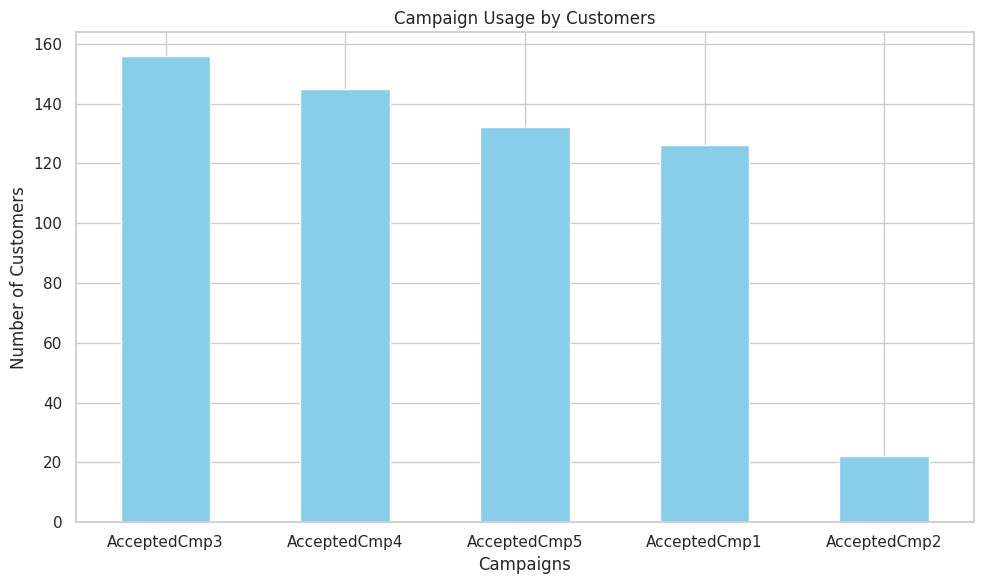

In [59]:
df_campaign_usage = df[campaigns].sum(axis=0).sort_values(ascending=False)

# Create a bar plot to visualize campaign usage
plt.figure(figsize=(10, 6))
df_campaign_usage.plot(kind='bar', color='skyblue')
plt.xlabel('Campaigns')
plt.ylabel('Number of Customers')
plt.title('Campaign Usage by Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(f'../report/plots/Campaign Usage by Customers.jpg')
# Show the plot
plt.show()

Insight:
- The top highest purchased was due to marketing campaign number 3, the lowest was due to campaign number 2.
- Although in markering campaign from the "Average CLV by Marketing Campaign" figure, has the lowest CLV, which push the customers to buy, as the CLV is suitable for them to make them buy.

## Analysis the Distribution of purchases from various channels

In [ ]:

# Create a stacked bar plot to visualize the distribution of purchases from various channels
plt.figure(figsize=(10, 6))
width = 0.35
index = range(len(df))

# Plot each channel's purchases as a separate bar
plt.bar(index, df['NumWebPurchases'], width, label='Web Purchases', color='skyblue')
plt.bar(index, df['NumStorePurchases'], width, label='Store Purchases', bottom=df['NumWebPurchases'], color='lightcoral')
plt.bar(index, df['NumCatalogPurchases'], width, label='Catalog Purchases', 
        bottom=[sum(x) for x in zip(df['NumWebPurchases'], df['NumStorePurchases'])], color='lightgreen')

plt.xlabel('Customers')
plt.ylabel('Number of Purchases')
plt.title('Distribution of Purchases from Various Channels')
plt.xticks(index, [f'Customer {i+1}' for i in index])
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()